In [1]:
import matplotlib.pyplot as plt
from boundaries.canada_boundary import CanadaBoundary
from data_sources.canada_boundary_data_source import CanadaBoundaryDataSource
from grid.square_meters_grid import SquareMetersGrid

# Preview Canada Boundary

In [3]:
canada = CanadaBoundary(CanadaBoundaryDataSource())
canada.load(exclude_area_above_60_degree=False)
canada.boundary

Canada boundary shapefile already downloaded, skipping download!


,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.46, 817623..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.44, 637874..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.64 ..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


Text(0.5, 1.0, 'Canada Boundary (EPSG:3347)')

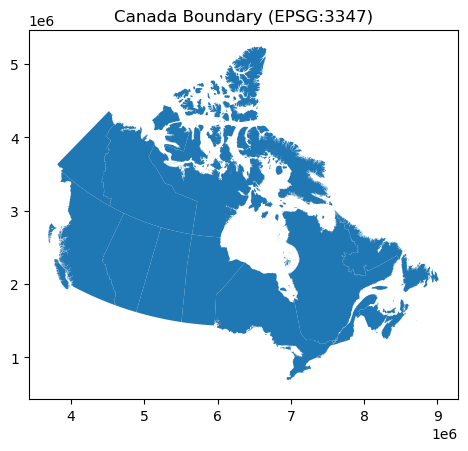

In [4]:
ax = canada.boundary.plot()
ax.set_title(f"Canada Boundary (EPSG:{canada.boundary.crs.to_epsg()})")

In [5]:
canada = CanadaBoundary(CanadaBoundaryDataSource())
canada.load(exclude_area_above_60_degree=True)
canada.boundary

Canada boundary shapefile already downloaded, skipping download!


,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.46, 817623..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.44, 637874..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.64 ..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


Text(0.5, 1.0, 'Restricted Canada Boundary (EPSG:3347)')

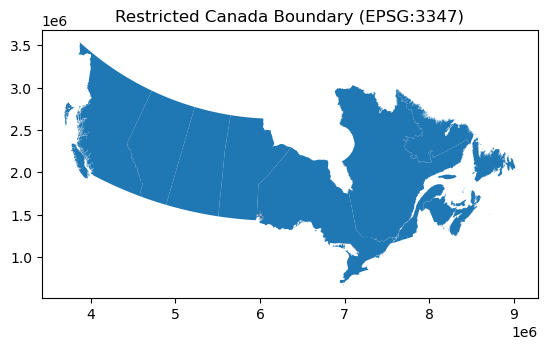

In [6]:
ax = canada.boundary.plot()
ax.set_title(f"Restricted Canada Boundary (EPSG:{canada.boundary.crs.to_epsg()})")

# Grid Area of Interest

## Canada-wise Grid

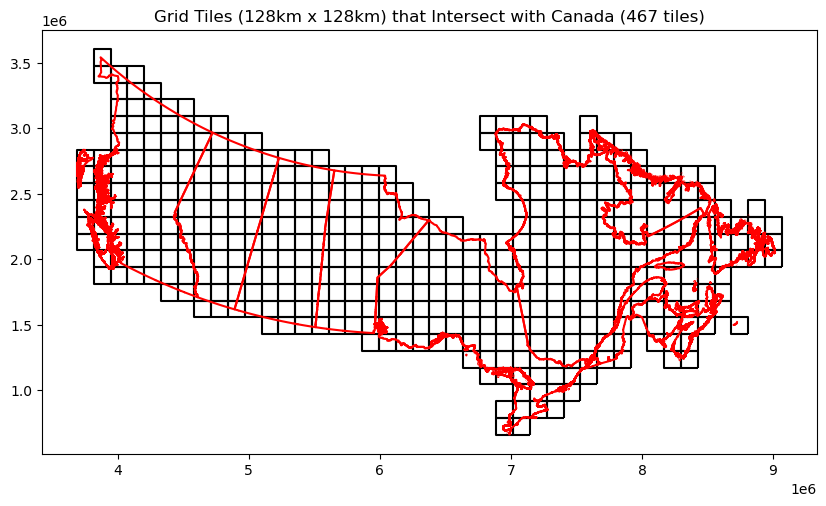

In [4]:
grid_250_512 = SquareMetersGrid(tile_resolution_in_meters=250, tile_length_in_pixels=512)

tiles_250_512 = grid_250_512.get_tiles(canada.boundary)

fig, ax = plt.subplots(figsize=(10, 10))
tiles_250_512.boundary.plot(ax=ax, edgecolor='black', facecolor='none')
canada.boundary.boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Grid Tiles ({int(grid_250_512.get_tile_size_in_km())}km x {int(grid_250_512.get_tile_size_in_km())}km) that Intersect with Canada ({len(tiles_250_512)} tiles)")
plt.show()

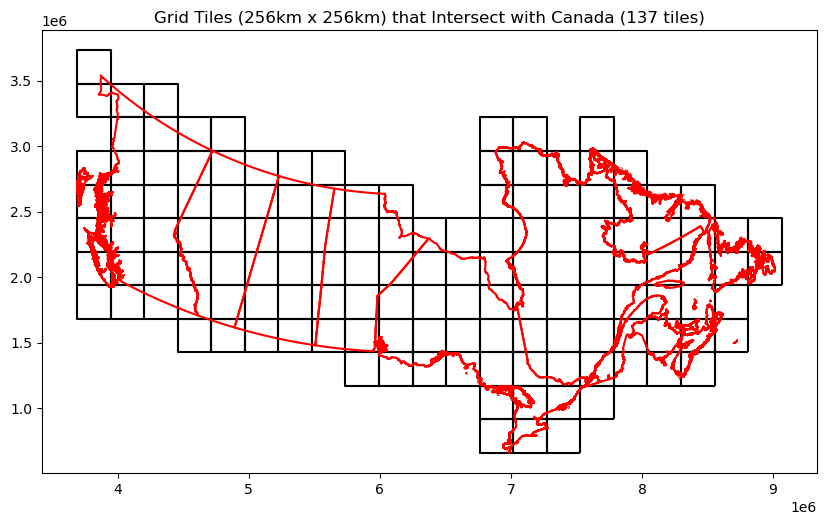

In [5]:
grid_250_1024 = SquareMetersGrid(tile_resolution_in_meters=250, tile_length_in_pixels=1024)

tiles_250_1024 = grid_250_1024.get_tiles(canada.boundary)

fig, ax = plt.subplots(figsize=(10, 10))
tiles_250_1024.boundary.plot(ax=ax, edgecolor='black', facecolor='none')
canada.boundary.boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Grid Tiles ({int(grid_250_1024.get_tile_size_in_km())}km x {int(grid_250_1024.get_tile_size_in_km())}km) that Intersect with Canada ({len(tiles_250_1024)} tiles)")
plt.show()

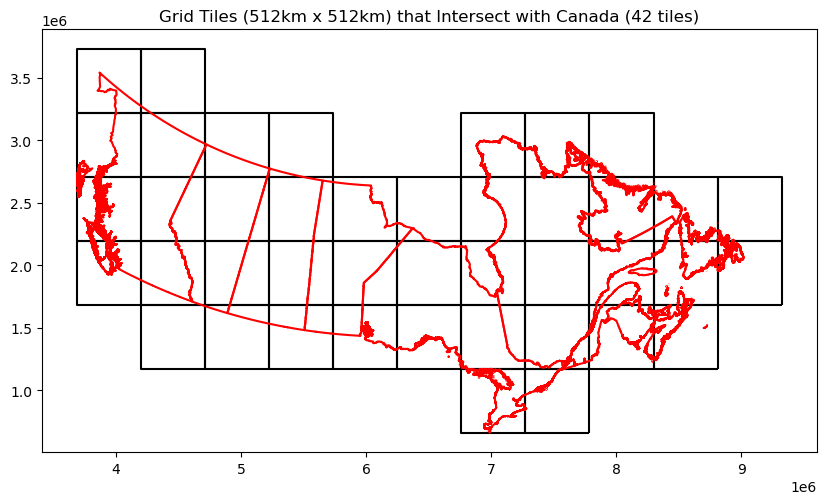

In [6]:
grid_250_2048 = SquareMetersGrid(tile_resolution_in_meters=250, tile_length_in_pixels=2048)

tiles_250_2048 = grid_250_2048.get_tiles(canada.boundary)

fig, ax = plt.subplots(figsize=(10, 10))
tiles_250_2048.boundary.plot(ax=ax, edgecolor='black', facecolor='none')
canada.boundary.boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Grid Tiles ({int(grid_250_2048.get_tile_size_in_km())}km x {int(grid_250_2048.get_tile_size_in_km())}km) that Intersect with Canada ({len(tiles_250_2048)} tiles)")
plt.show()

# Reprojection

In [7]:
target_epsg = 4326
canada_boundary_reprojected = canada.boundary.to_crs(epsg=target_epsg)

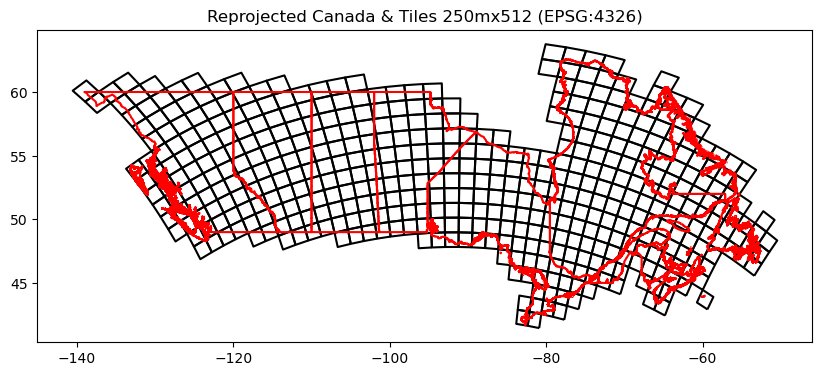

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
tiles_250_512.to_crs(epsg=target_epsg).boundary.plot(ax=ax, edgecolor='black', facecolor='none')
ax = canada_boundary_reprojected.boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Reprojected Canada & Tiles 250mx512 (EPSG:{canada_boundary_reprojected.boundary.crs.to_epsg()})")
plt.show()

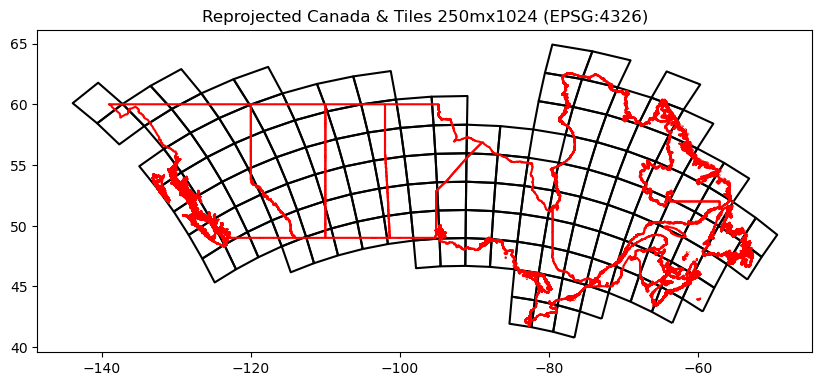

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
tiles_250_1024.to_crs(epsg=target_epsg).boundary.plot(ax=ax, edgecolor='black', facecolor='none')
ax = canada_boundary_reprojected.boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Reprojected Canada & Tiles 250mx1024 (EPSG:{canada_boundary_reprojected.boundary.crs.to_epsg()})")
plt.show()

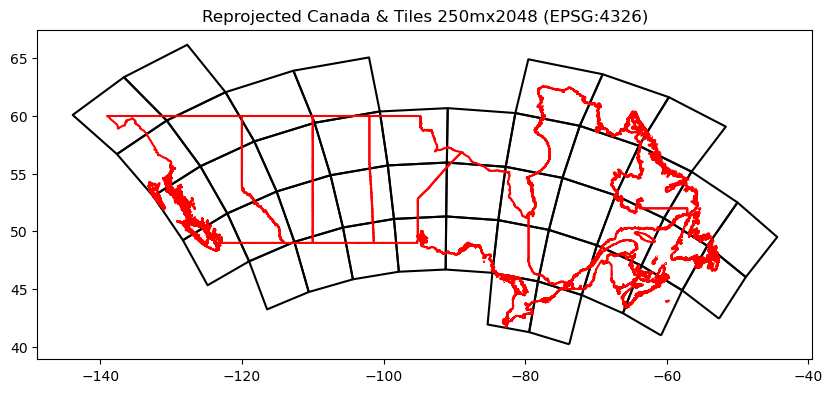

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
tiles_250_2048.to_crs(epsg=target_epsg).boundary.plot(ax=ax, edgecolor='black', facecolor='none')
ax = canada_boundary_reprojected.boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Reprojected Canada & Tiles 250mx2048 (EPSG:{canada_boundary_reprojected.boundary.crs.to_epsg()})")
plt.show()